## Probabilities and Models

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from core import events, probability_matrix, direct_query, code_toggle, stats
import scipy
from sklearn.utils.extmath import cartesian
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from IPython.display import HTML

In [2]:
leagues = stats(league="'8','564','2'")

In [3]:
analysis = leagues[leagues['team_name'].isin(['Liverpool','Real Madrid'])]

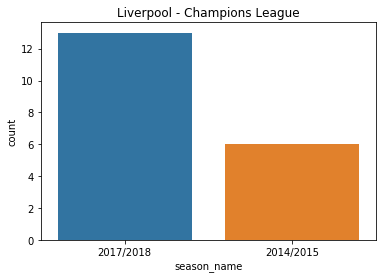

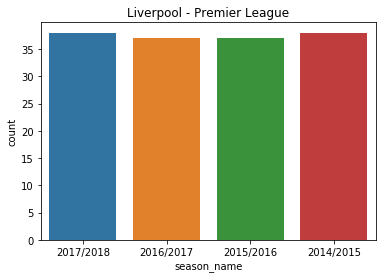

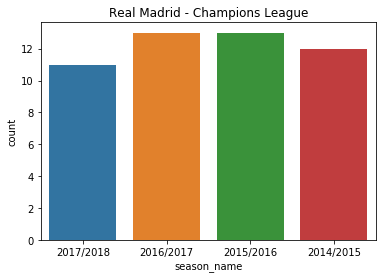

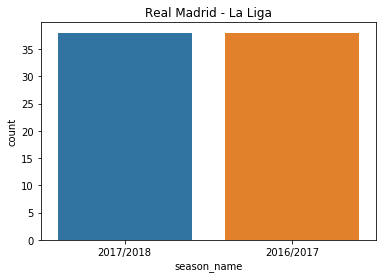

In [4]:
for team in ['Liverpool','Real Madrid']:
    madrid = analysis[analysis['team_name']==team]
    for name in list(np.unique(madrid['league_name'])):
        plt.title('{0} - {1}'.format(team, name))
        sns.countplot(madrid[madrid['league_name']==name]['season_name'])
        plt.show()

In [13]:
#keep this seasons only and remove play-off legs 1 and 2 for Liverpool (stage_id = 56863)
this_season = analysis[
    (analysis['season_name'] == '2017/2018')&
    (this_season['stage_id']!=56863)]

In [14]:
list(this_season.columns)

['created_on',
 'updated_on',
 'id',
 'stat_id',
 'fixture_id',
 'team_id',
 'attacks',
 'dangerous_attacks',
 'corners',
 'fouls',
 'free_kick',
 'goal_kick',
 'offsides',
 'possessiontime',
 'redcards',
 'saves',
 'accurate_passes',
 'pct_accurate_passes',
 'total_passes',
 'blocked_shots',
 'insidebox_shots',
 'offgoal_shots',
 'ongoal_shots',
 'outsidebox_shots',
 'total_shots',
 'substitutions',
 'throw_in',
 'yellowcards',
 'season_id',
 'stage_id',
 'season_name',
 'team_name',
 'league_name',
 'starting_date',
 'goals_for',
 'goals_against',
 'local_visitor',
 'outcome',
 'localteam_score',
 'visitorteam_score']

In [15]:
agg = {
'attacks': 'mean',
 'dangerous_attacks': 'mean',
 'corners': 'mean',
 'fouls': 'mean',
 'free_kick': 'mean',
 'goal_kick': 'mean',
 'offsides': 'mean',
 'possessiontime': 'mean',
 'redcards': 'mean',
 'saves': 'mean',
 'accurate_passes': 'mean',
 'pct_accurate_passes': 'mean',
 'total_passes': 'mean',
 'blocked_shots': 'mean',
 'insidebox_shots': 'mean',
 'offgoal_shots': 'mean',
 'ongoal_shots': 'mean',
 'outsidebox_shots': 'mean',
 'total_shots': 'mean',
 'substitutions': 'mean',
 'throw_in': 'mean',
 'yellowcards': 'mean',
 'goals_for': 'mean',
 'goals_against': 'mean',
    'outcome': 'count',
    
}

this_season.groupby('team_name').agg(agg).reset_index()

temp = this_season.groupby('team_name').agg(agg).reset_index()
madrid_goals_for = temp[temp['team_name']=='Real Madrid']['goals_for']
madrid_goals_against = temp[temp['team_name']=='Real Madrid']['goals_against']

liv_goals_for = temp[temp['team_name']=='Liverpool']['goals_for']
liv_goals_against = temp[temp['team_name']=='Liverpool']['goals_against']

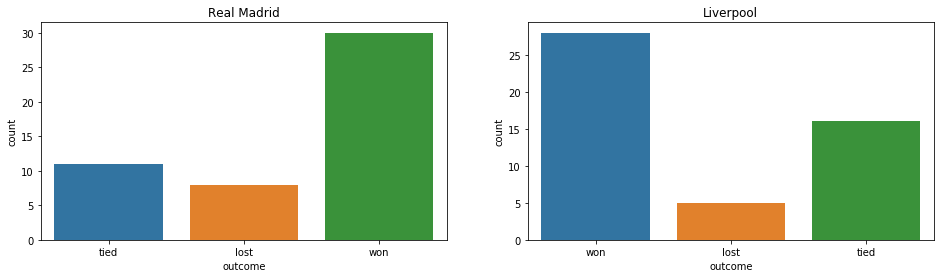

In [16]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.title('Real Madrid')
sns.countplot(this_season[this_season['team_name']=='Real Madrid']['outcome'])

plt.subplot(1,2,2)
plt.title('Liverpool')
sns.countplot(this_season[this_season['team_name']=='Liverpool']['outcome'])

### Champions only

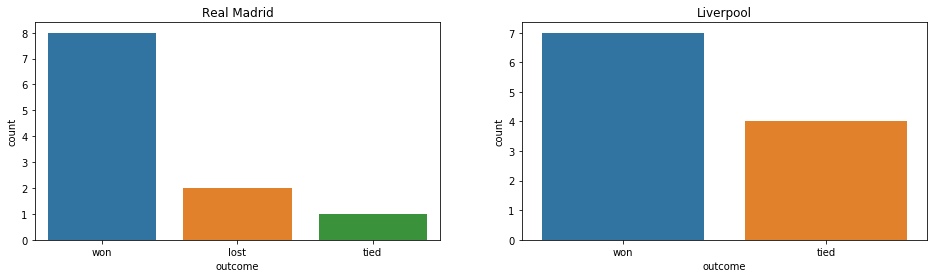

In [17]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.title('Real Madrid')
sns.countplot(this_season[(this_season['team_name']=='Real Madrid')&
                         (this_season['league_name']=='Champions League')
                         ]['outcome'])

plt.subplot(1,2,2)
plt.title('Liverpool')
sns.countplot(this_season[(this_season['team_name']=='Liverpool')&
                         (this_season['league_name']=='Champions League')
                         ]['outcome'])

In [19]:
this_season[(this_season['team_name']=='Real Madrid')&
                         (this_season['league_name']=='Champions League')].sort_values('starting_date', ascending=False)

,created_on,updated_on,id,stat_id,fixture_id,team_id,attacks,dangerous_attacks,corners,fouls,...,season_name,team_name,league_name,starting_date,goals_for,goals_against,local_visitor,outcome,localteam_score,visitorteam_score
659,2018-05-02 06:54:37.031508+00:00,2018-05-02 06:54:37.031543+00:00,153459,10324973,10321505,3468,85.0,46.0,3.0,15.0,...,2017/2018,Real Madrid,Champions League,2018-04-25,2,1,visitor,won,1,2
559,2018-05-02 06:33:15.061213+00:00,2018-05-02 06:33:15.061250+00:00,146340,10309535,10306067,3468,139.0,91.0,7.0,8.0,...,2017/2018,Real Madrid,Champions League,2018-04-11,1,3,local,lost,1,3
507,2018-05-02 06:21:53.673735+00:00,2018-05-02 06:21:53.673773+00:00,142513,10309534,10306066,3468,105.0,56.0,6.0,16.0,...,2017/2018,Real Madrid,Champions League,2018-04-03,3,0,visitor,won,0,3
383,2018-05-02 05:45:55.003665+00:00,2018-05-02 05:45:55.003701+00:00,130052,8804542,8801074,3468,111.0,67.0,8.0,11.0,...,2017/2018,Real Madrid,Champions League,2018-03-06,2,1,visitor,won,1,2
249,2018-05-02 05:20:03.431974+00:00,2018-05-02 05:20:03.432010+00:00,122011,8804541,8801073,3468,78.0,75.0,11.0,14.0,...,2017/2018,Real Madrid,Champions League,2018-02-14,3,1,local,won,3,1
1574,2018-05-02 10:50:10.602510+00:00,2018-05-02 10:50:10.602546+00:00,196525,5936321,5932853,3468,128.0,93.0,9.0,3.0,...,2017/2018,Real Madrid,Champions League,2017-12-06,3,2,local,won,3,2
1426,2018-05-02 10:32:26.983412+00:00,2018-05-02 10:32:26.983478+00:00,191737,5936297,5932829,3468,94.0,67.0,5.0,10.0,...,2017/2018,Real Madrid,Champions League,2017-11-21,6,0,visitor,won,0,6
1332,2018-05-02 10:09:29.161684+00:00,2018-05-02 10:09:29.161719+00:00,185538,5936290,5932822,3468,98.0,74.0,11.0,6.0,...,2017/2018,Real Madrid,Champions League,2017-11-01,1,3,visitor,lost,3,1
1204,2018-05-02 09:47:05.258742+00:00,2018-05-02 09:47:05.258780+00:00,180652,5936266,5932798,3468,114.0,102.0,9.0,12.0,...,2017/2018,Real Madrid,Champions League,2017-10-17,1,1,local,tied,1,1
1090,2018-05-02 09:21:26.160338+00:00,2018-05-02 09:21:26.160373+00:00,174969,5936249,5932781,3468,102.0,67.0,6.0,8.0,...,2017/2018,Real Madrid,Champions League,2017-09-26,3,1,visitor,won,1,3


,created_on,updated_on,id,stat_id,fixture_id,team_id,attacks,dangerous_attacks,corners,fouls,...,season_name,team_name,league_name,starting_date,goals_for,goals_against,local_visitor,outcome,localteam_score,visitorteam_score
791,2018-05-02 08:25:03.644796+00:00,2018-05-02 08:25:03.644832+00:00,162934,5402579,5402571,8,NaN,NaN,5.0,12.0,...,2017/2018,Liverpool,Champions League,2017-08-15,2,1,visitor,won,1,2
861,2018-05-02 08:35:03.485347+00:00,2018-05-02 08:35:03.485381+00:00,165016,5402580,5402572,8,NaN,NaN,4.0,3.0,...,2017/2018,Liverpool,Champions League,2017-08-23,4,2,local,won,4,2


In [66]:
this_season[this_season['team_name']=='Real Madrid']['outcome'].value_counts()

won     30
tied    11
lost     8
Name: outcome, dtype: int64

In [67]:
this_season[this_season['team_name']=='Liverpool']['outcome'].value_counts()

won     30
tied    16
lost     5
Name: outcome, dtype: int64

In [63]:
this_season.groupby('team_name').agg(agg).transpose()

team_name,Liverpool,Real Madrid
attacks,120.102041,99.739130
dangerous_attacks,73.959184,74.913043
corners,6.060000,7.387755
fouls,9.490196,11.204082
free_kick,11.272727,14.444444
goal_kick,5.939394,5.555556
offsides,2.285714,3.545455
possessiontime,57.098039,58.755102
redcards,0.040000,0.081633
saves,2.162791,2.770833


In [27]:
madrid_leagues = leagues[
    (leagues['league_name'].isin(['Champions League','La Liga']))&
    (leagues['season_name']=='2017/2018')
]
liverpool_leagues = leagues[
    (leagues['league_name'].isin(['Champions League','Premier League']))&
    (leagues['season_name']=='2017/2018')
]

In [28]:
madrid_leagues.head()

,created_on,updated_on,id,stat_id,fixture_id,team_id,attacks,dangerous_attacks,corners,fouls,...,season_name,team_name,league_name,starting_date,goals_for,goals_against,local_visitor,outcome,localteam_score,visitorteam_score
22,2018-05-02 04:41:39.593944+00:00,2018-05-02 04:41:39.593979+00:00,110017,4194253,4194147,106,91.0,51.0,NaN,17.0,...,2017/2018,Getafe,La Liga,2018-01-06,0,2,visitor,lost,2,0
23,2018-05-02 04:41:39.626150+00:00,2018-05-02 04:41:39.626187+00:00,110018,4202127,4194147,7980,128.0,71.0,5.0,11.0,...,2017/2018,Atlético Madrid,La Liga,2018-01-06,2,0,local,won,2,0
24,2018-05-02 04:42:33.271337+00:00,2018-05-02 04:42:33.271373+00:00,110296,4194356,4194142,214,99.0,85.0,9.0,16.0,...,2017/2018,Valencia,La Liga,2018-01-06,2,1,local,won,2,1
25,2018-05-02 04:42:33.297607+00:00,2018-05-02 04:42:33.297644+00:00,110297,4194373,4194142,231,94.0,47.0,7.0,14.0,...,2017/2018,Girona,La Liga,2018-01-06,1,2,visitor,lost,2,1
26,2018-05-02 04:42:43.022221+00:00,2018-05-02 04:42:43.022267+00:00,110364,4194199,4194139,60,88.0,58.0,3.0,17.0,...,2017/2018,Eibar,La Liga,2018-01-06,2,1,visitor,won,1,2


In [29]:
madrid_avg_goals_for = np.mean(madrid_leagues['goals_for'])
madrid_avg_goals_against = np.mean(madrid_leagues['goals_against'])

liv_avg_goals_for = np.mean(liverpool_leagues['goals_for'])
liv_avg_goals_against = np.mean(liverpool_leagues['goals_against'])

In [30]:
#madrid attack strength
madrid_attack = float(madrid_goals_for/madrid_avg_goals_for)

#madrid defense strength
madrid_defense = float(madrid_goals_against/madrid_avg_goals_against)

#liverpool attack strength
liv_attack = float(liv_goals_for / liv_avg_goals_for)

#liverpool defense strength
liv_defense = float(liv_goals_against / liv_avg_goals_against)

In [31]:
print (madrid_attack, madrid_defense)
print (liv_attack, liv_defense)

1.7880822658733824 0.8332609639600521
1.7865094089583886 0.686462408797716


In [32]:
madrid_score = madrid_attack * liv_defense * madrid_avg_goals_for
liv_score = liv_attack * madrid_defense * liv_avg_goals_for

print (madrid_score, liv_score)

1.7091513035371708 2.074649747002579


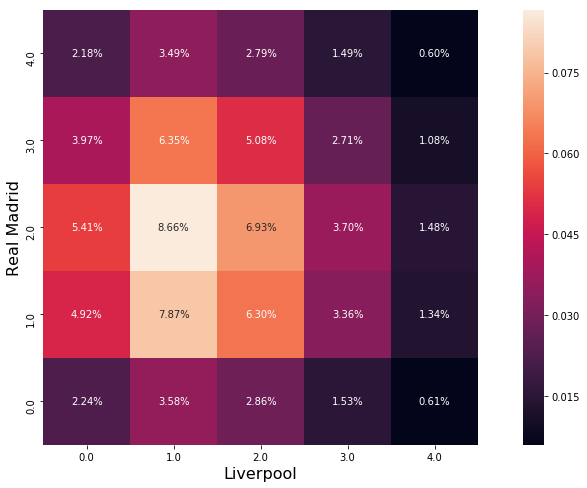

In [35]:
goals = [0,1,2,3,4]
#2.2, 1.6
poisson = scipy.stats.distributions.poisson
madrid_prob = poisson.pmf(goals, madrid_score )
liv_prob = poisson.pmf(goals, liv_score)

home_df = pd.DataFrame([madrid_prob,goals], index=['home_prob','home_score']).transpose()
away_df = pd.DataFrame([liv_prob,goals], index=['away_prob','away_score']).transpose()

#probability matrix with all scores combinations
all_results = pd.DataFrame(cartesian([madrid_prob, liv_prob]), columns = ['home_prob','away_prob']).merge(
    home_df, on='home_prob', how='inner'
).merge(
    away_df, on='away_prob', how='inner'
)

home_prob = np.sum(
    all_results[all_results['home_score'] > all_results['away_score']]['home_prob']*
    all_results[all_results['home_score'] > all_results['away_score']]['away_prob']
)


tie_prob = np.sum(
    all_results[all_results['home_score'] == all_results['away_score']]['home_prob']*
    all_results[all_results['home_score'] == all_results['away_score']]['away_prob']
)


away_prob = np.sum(
    all_results[all_results['home_score'] < all_results['away_score']]['home_prob']*
    all_results[all_results['home_score'] < all_results['away_score']]['away_prob']
)

outcome = [home_prob, tie_prob, 1. - (home_prob+tie_prob)] # using 1.- to add to complete 100.00%


all_results['prob'] = all_results['home_prob']*all_results['away_prob']
prob_matrix = all_results.pivot('home_score', 'away_score', 'prob')

plt.figure(figsize=(16,8))
ax = sns.heatmap(prob_matrix, annot=True, fmt = '.2%', square=1)

plt.xlabel('Liverpool', fontsize=16)
plt.ylabel('Real Madrid', fontsize=16)
ax.invert_yaxis()

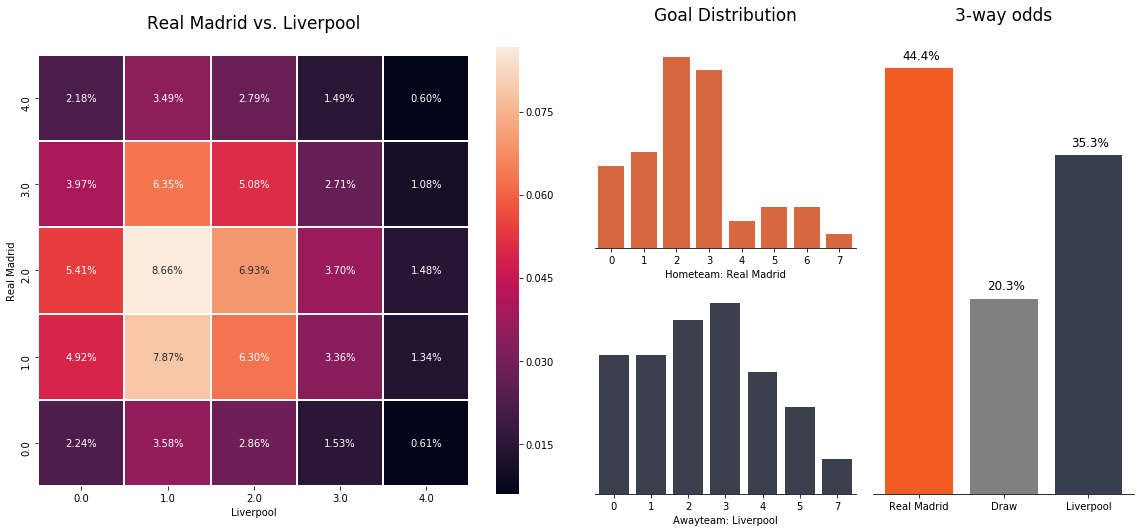

In [40]:
#plot
hometeam = 'Real Madrid'
awayteam = 'Liverpool'

plt.figure(figsize=(16,7.5))
plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)
axx = sns.heatmap(prob_matrix, annot=True, fmt = '.2%', square=1, linewidth=1.)
axx.invert_yaxis()
plt.title('{0} vs. {1}\n'.format(hometeam, awayteam), fontsize=17)
plt.xlabel(awayteam)
plt.ylabel(hometeam)

ax = plt.subplot2grid((2, 4), (0, 2))
plt.title('Goal Distribution\n', fontsize=17)
sns.countplot(madrid_leagues[madrid_leagues['team_name'] == hometeam]['goals_for'], color='#f15b24')
plt.xlabel('Hometeam: {0}'.format(hometeam))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks([], [])
plt.ylabel('')

ax1 = plt.subplot2grid((2, 4), (1, 2))
sns.countplot(liverpool_leagues[liverpool_leagues['team_name'] == awayteam]['goals_for'], color='#363e4f')
plt.xlabel('Awayteam: {0}'.format(awayteam))
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.yticks([], [])
plt.ylabel('')

ax2 = plt.subplot2grid((2, 4), (0, 3), rowspan=2)
plt.title('3-way odds\n', fontsize=17)
plt.bar(range(len(outcome)),outcome, color=['#f15b24','grey','#363e4f'])
plt.xticks(range(len(outcome)), [hometeam, 'Draw',awayteam])
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.yticks([], [])
plt.ylabel('')
plt.text(-0.2, outcome[0]+0.01, '{:.1%}'.format(outcome[0]), fontsize=12)
plt.text(0.8, outcome[1]+0.01, '{:.1%}'.format(outcome[1]), fontsize=12)
plt.text(1.8, outcome[2]+0.01, '{:.1%}'.format(outcome[2]), fontsize=12)

plt.tight_layout()
plt.savefig('ChampionsFinal.png')
plt.show()

In [37]:
1/0.444

2.2522522522522523

In [15]:
goals_for

array([ 0.08128417,  0.20400733,  0.25600921,  0.21417765,  0.13438598])

In [16]:
goals_against

array([ 0.37516401,  0.36780779,  0.18029791,  0.05892088,  0.01444139])

In [3]:
epl = events(league=8)

In [4]:
laliga = events(league=564)

In [9]:
mls = events(league = 779)

In [2]:
brasileirao = events(league = 648)

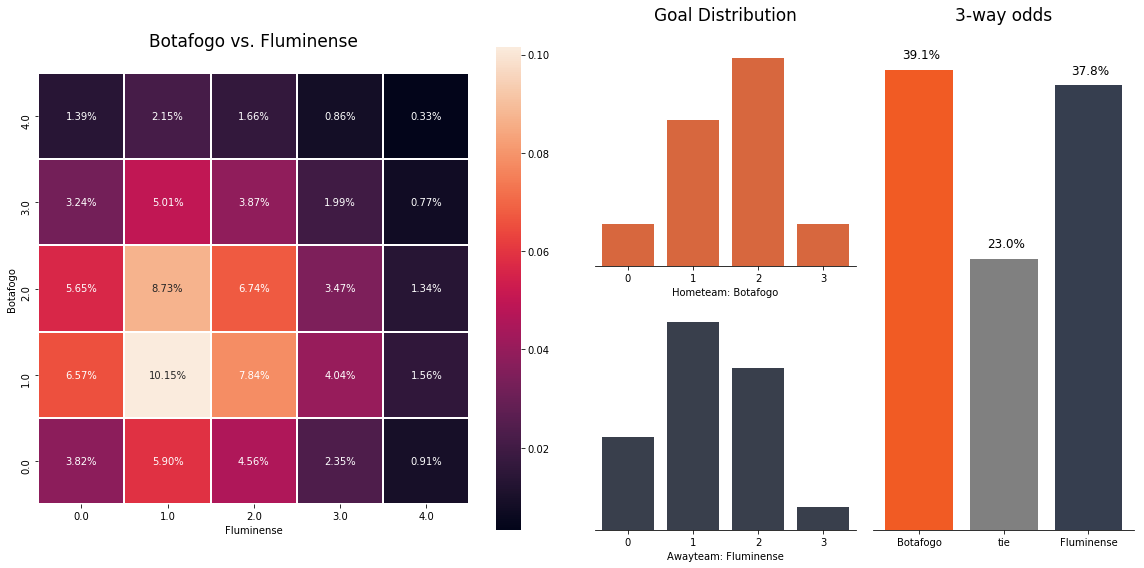

In [4]:
probability_matrix(brasileirao, hometeam = 'Botafogo', awayteam='Fluminense', goals_list=[0,1,2,3,4], season=['2017','2018'], save_image=True);

In [24]:
wp_madrid = 0.7272727272727272 / 2
wp_liv = 0.63636363636/2

print (1/wp_madrid, 1/wp_liv, 1/(1-wp_madrid-wp_liv))

2.7500000000000004 3.1428571428751018 3.142857142839183


## Step by step calculations

In [ ]:
s2015 = epl[epl['season'] == '2015/2016']

#game result only (removing duplicates for all events. Another option is to query fixtures only w/o events)
gs2015 = s2015[['fixture_id','localname', 'localteam_score','visitorteam_score','visitorname','season']].drop_duplicates()

In [ ]:
hometeam = 'Tottenham Hotspur'
awayteam = 'Everton'

### Attack Strenght

In [ ]:
average_home = np.sum(gs2015['localteam_score'])/len(gs2015)
average_away = np.sum(gs2015['visitorteam_score'])/len(gs2015)

print ('Premier League 2015/2016')
print ('Home: ', average_home, '\t\tAway :', average_away)

In [ ]:
tot_att_home = np.sum(gs2015[gs2015['localname']==hometeam]['localteam_score'])/len(gs2015[gs2015['localname']==hometeam])/average_home
tot_att_away = np.sum(gs2015[gs2015['visitorname']==hometeam]['visitorteam_score'])/len(gs2015[gs2015['visitorname']==hometeam])/average_away

print (hometeam)
print ('Home: ', tot_att_home, '\t\tAway :', tot_att_away)

In [ ]:
eve_att_home = np.sum(gs2015[gs2015['localname']==awayteam]['localteam_score'])/len(gs2015[gs2015['localname']==awayteam])/average_home
eve_att_away = np.sum(gs2015[gs2015['visitorname']==awayteam]['visitorteam_score'])/len(gs2015[gs2015['visitorname']==awayteam])/average_away

print (awayteam)
print ('Home: ', eve_att_home, '\t\tAway :', eve_att_away)

### Defense Strenght

In [ ]:
tot_def_home = np.sum(gs2015[gs2015['localname']==hometeam]['visitorteam_score'])/len(gs2015[gs2015['localname']==hometeam])/average_away
tot_def_away = np.sum(gs2015[gs2015['visitorname']==hometeam]['localteam_score'])/len(gs2015[gs2015['visitorname']==hometeam])/average_home

print (hometeam)
print ('Home: ', tot_def_home, '\t\tAway :', tot_def_away)

In [ ]:
eve_def_home = np.sum(gs2015[gs2015['localname']==awayteam]['visitorteam_score'])/len(gs2015[gs2015['localname']==awayteam])/average_away
eve_def_away = np.sum(gs2015[gs2015['visitorname']==awayteam]['localteam_score'])/len(gs2015[gs2015['visitorname']==awayteam])/average_home

print (awayteam)
print ('Home: ', eve_def_home, '\t\tAway :', eve_def_away)

### Expected Goals

In [ ]:
#goals tottenham will score:
tot_goals = tot_att_home * eve_def_away * average_home

#goals everton will score;
eve_goals = eve_att_away * tot_def_home * average_away

In [ ]:
print ('Expected Result: ', hometeam,tot_goals,eve_goals,awayteam)

### Poisson Distribution

In [ ]:
import scipy
from sklearn.utils.extmath import cartesian
import pandas as pd

In [ ]:
poisson = scipy.stats.distributions.poisson
goals = [0,1,2,3,4,5]
tot_prob = poisson.pmf(goals, tot_goals)
eve_prob = poisson.pmf(goals, eve_goals)

tot_df = pd.DataFrame([tot_prob,goals], index=['tot_prob','tot_score']).transpose()
eve_df = pd.DataFrame([eve_prob,goals], index=['eve_prob','eve_score']).transpose()

In [ ]:
all_results = pd.DataFrame(cartesian([tot_prob, eve_prob]), columns = ['tot_prob','eve_prob']).merge(
        tot_df, on='tot_prob', how='inner'
    ).merge(
        eve_df, on='eve_prob', how='inner'
    )

all_results['prob'] = all_results['tot_prob']*all_results['eve_prob']
all_results.sort_values('prob', ascending=False).reset_index(drop=True)

prob_matrix = all_results.pivot('tot_score', 'eve_score', 'prob')

In [ ]:
home_prob = np.sum(
    all_results[all_results['tot_score'] > all_results['eve_score']]['tot_prob']*
    all_results[all_results['tot_score'] > all_results['eve_score']]['eve_prob']
)


tie_prob = np.sum(
    all_results[all_results['tot_score'] == all_results['eve_score']]['tot_prob']*
    all_results[all_results['tot_score'] == all_results['eve_score']]['eve_prob']
)


away_prob = np.sum(
    all_results[all_results['tot_score'] < all_results['eve_score']]['tot_prob']*
    all_results[all_results['tot_score'] < all_results['eve_score']]['eve_prob']
)


outcome = [home_prob, tie_prob,1. - (home_prob+tie_prob)]

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(prob_matrix, annot=True)
plt.title('{0} vs. {1}'.format(hometeam, awayteam), fontsize=20)
plt.xlabel(awayteam)
plt.ylabel(hometeam);

In [ ]:
#1/prob_matrix to check decimal odds
prob_matrix

### Possession Time vs. Result

In [5]:
epl = stats(league = 8)
laliga = stats(league=564)

''

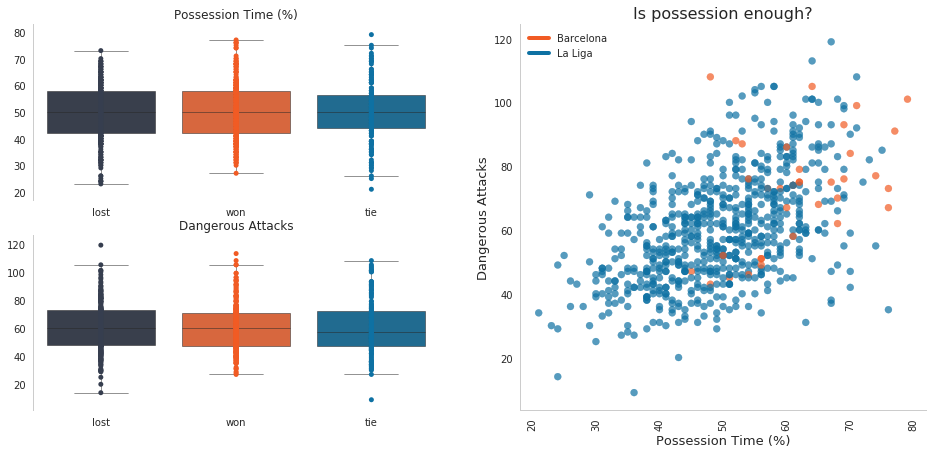

In [154]:
from matplotlib.lines import Line2D

filtered['color'] = '#0e71a3'

mask = filtered['team_name'] == 'Barcelona'
column_name = 'color'
filtered.loc[mask, column_name] = '#f15b24'

sns.set_style("whitegrid")
plt.figure(figsize=(16,7.1))
ax1 = plt.subplot2grid((2, 2), (0, 0))
color_array=[
    '#363e4f','#f15b24','#0e71a3'
]
x = sns.color_palette(color_array)
plt.grid(False)
plt.title("Possession Time (%)")
sns.boxplot(filtered['outcome'], filtered['possessiontime'], palette=x, linewidth=0.5, fliersize=0.5)
sns.stripplot(filtered['outcome'], filtered['possessiontime'], palette=x)
plt.xlabel("")
plt.ylabel("")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

ax2 = plt.subplot2grid((2, 2), (1, 0))
plt.grid(False)
plt.title("Dangerous Attacks")
sns.boxplot(filtered['outcome'], filtered['dangerous_attacks'], palette=x, linewidth=0.5, fliersize=0.5)
sns.stripplot(filtered['outcome'], filtered['dangerous_attacks'], palette=x)
plt.xlabel("")
plt.ylabel("")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)


ax = plt.subplot2grid((2, 2), (0, 1), rowspan=2)
plt.grid(False)
plt.title("Is possession enough?", fontsize=16)
ax.scatter(filtered['possessiontime'], filtered['dangerous_attacks'], color=filtered['color'], alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#sns.stripplot(laliga['team_name'], laliga['possessiontime'])
plt.xticks(rotation='vertical')
plt.xlabel("Possession Time (%)", fontsize=13)
plt.ylabel("Dangerous Attacks",fontsize=13)

legend_elements = [Line2D([0], [0], color='#f15b24', lw=4, label='Line'),
                   Line2D([0], [0], color='#0e71a3', lw=4, label='Line')]


ax.legend(legend_elements, ['Barcelona','La Liga'], loc='upper left')
;